In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# we need to flatten the y since its in shape (N,)
y_train, y_test = y_train.flatten(), y_test.flatten()
# Divide the pixels by 255 as always
# because having a data centered around .5 or 0 is more preferred and convenient
x_train, x_test = x_train / 255.0, x_test / 255.0
print('y_train.shape', y_train.shape)
print('x_train.shape', x_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
y_train.shape (50000,)
x_train.shape (50000, 32, 32, 3)


In [4]:
# number of classes
K = len(set(y_train))
print('Number of classes:', K)

Number of classes: 10


In [0]:
# Build the model
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)

In [6]:
# Compile the data and fit
# Note: make sure you are using the GPu for this
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 270us/sample - loss: 1.5582 - accuracy: 0.4297 - val_loss: 1.3486 - val_accuracy: 0.5153
Epoch 2/15
50000/50000 [==============================] - 7s 139us/sample - loss: 1.2870 - accuracy: 0.5348 - val_loss: 1.1155 - val_accuracy: 0.6051
Epoch 3/15
50000/50000 [==============================] - 7s 138us/sample - loss: 1.1587 - accuracy: 0.5851 - val_loss: 1.0347 - val_accuracy: 0.6383
Epoch 4/15
50000/50000 [==============================] - 7s 142us/sample - loss: 1.0734 - accuracy: 0.6166 - val_loss: 0.9819 - val_accuracy: 0.6487
Epoch 5/15
50000/50000 [==============================] - 7s 139us/sample - loss: 1.0004 - accuracy: 0.6424 - val_loss: 0.9727 - val_accuracy: 0.6645
Epoch 6/15
50000/50000 [==============================] - 7s 136us/sample - loss: 0.9351 - accuracy: 0.6670 - val_loss: 0.9129 - val_accuracy: 0.6827
Epoch 7/15
50000/50000 [=========================

[]

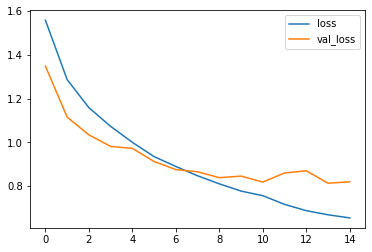

In [7]:
# Let's plot the results!
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.plot()
# We may say that the model is overfitting a little bit since
# the loss of validation_data is higher in the last periods

[]

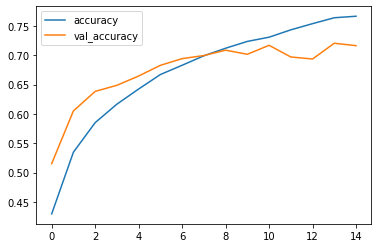

In [9]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.plot()
# It's interesting to have a kinda steady accuracy on validation data
# because the loss of validation_data goes higher and higher on the loss graph
# this could mean is that the model is becoming more and more confident
# in its incorrect predictions

Confusion matrix, without normalization
[[719  22  64  18  21   5  17  11  86  37]
 [ 14 824   9   8   3   5  27   6  17  87]
 [ 44   7 598  77  69  60  97  35   9   4]
 [  9   8  73 566  44 155 101  29   7   8]
 [ 14   3  68  79 636  33  99  57   9   2]
 [  7   2  51 216  41 578  51  44   6   4]
 [  4   3  34  43  21  29 854   6   5   1]
 [  4   3  23  54  63  49  16 775   7   6]
 [ 43  31  18  20   9   9  13   5 831  21]
 [ 22  75  15  36   4   6  18  17  26 781]]


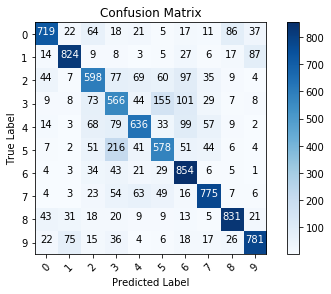

In [10]:
# Plot confusion matrix
# Code source: 
# https://colab.research.google.com/drive/11OHqNJQhT7rnNc2rmv7bs8uICkncgqWm

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
# label mapping
labels = ''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

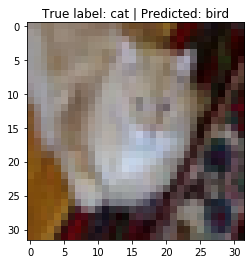

In [57]:
# misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title('True label: %s | Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));